In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [29]:
df=pd.read_csv("C:\\Users\\farhanfarooq\\Desktop\\work files\\ExcelR\\Assignments\\crime_data Clustering.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [30]:
df=(df.iloc[:,1:])

In [31]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


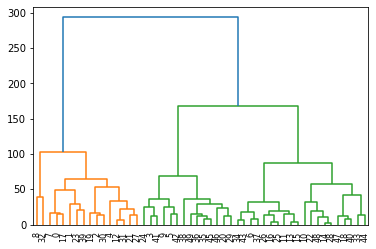

In [32]:
dendrogram=sch.dendrogram(sch.linkage(df,method='complete'))

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [35]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [36]:
y_hc = hc.fit_predict(df)
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [37]:
clusters

,clusters
0,0
1,0
2,0
3,2
4,0
5,2
6,1
7,0
8,0
9,2


In [38]:
clusters.value_counts()

clusters
1           20
0           16
2           14
dtype: int64

In [39]:
df['h_clusterid']=y_hc

In [40]:
df.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0


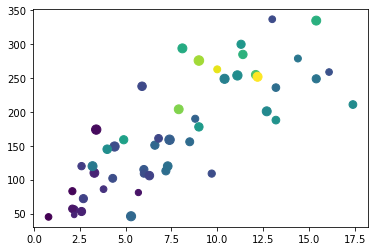

In [41]:
plt.scatter(df['Murder'],df['Assault'],df['UrbanPop'],df['Rape'])

In [42]:
from sklearn.cluster import KMeans

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.iloc[:,1:])

In [45]:
scaled_df

array([[ 0.79078716, -0.52619514, -0.00345116, -1.24101046],
       [ 1.11805959, -1.22406668,  2.50942392, -1.24101046],
       [ 1.49381682,  1.00912225,  1.05346626, -1.24101046],
       [ 0.23321191, -1.08449238, -0.18679398,  1.34442799],
       [ 1.2756352 ,  1.77678094,  2.08881393, -1.24101046],
       [ 0.40290872,  0.86954794,  1.88390137,  1.34442799],
       [-0.73648418,  0.79976079, -1.09272319,  0.05170877],
       [ 0.81502956,  0.45082502, -0.58583422, -1.24101046],
       [ 1.99078607,  1.00912225,  1.1505301 , -1.24101046],
       [ 0.48775713, -0.38662083,  0.49265293,  1.34442799],
       [-1.51224105,  1.21848371, -0.11129987,  0.05170877],
       [-0.61527217, -0.80534376, -0.75839217,  0.05170877],
       [ 0.94836277,  1.21848371,  0.29852525, -1.24101046],
       [-0.70012057, -0.03768506, -0.0250209 ,  0.05170877],
       [-1.39102904, -0.5959823 , -1.07115345,  0.05170877],
       [-0.67587817,  0.03210209, -0.34856705,  0.05170877],
       [-0.74860538, -0.

C:\Users\farhanfarooq\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


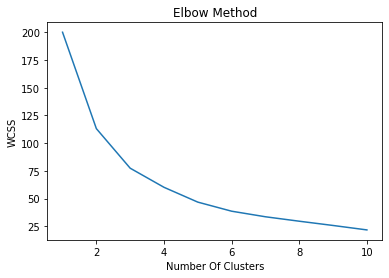

In [46]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
cluster_new=KMeans(4,random_state=34)
cluster_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=34)

In [49]:
cluster_new.labels_

array([0, 3, 3, 2, 3, 2, 1, 0, 3, 2, 2, 1, 3, 1, 1, 1, 1, 0, 1, 3, 2, 3,
       1, 0, 2, 1, 1, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2])

In [50]:
df['ClusterId_new']=cluster_new.labels_

In [51]:
df

,Murder,Assault,UrbanPop,Rape,h_clusterid,ClusterId_new
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,0,3
2,8.1,294,80,31.0,0,3
3,8.8,190,50,19.5,2,2
4,9.0,276,91,40.6,0,3
5,7.9,204,78,38.7,2,2
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,0,3
9,17.4,211,60,25.8,2,2


In [52]:
df.groupby('ClusterId_new').agg(['mean']).reset_index()

,ClusterId_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,13.000000,266.333333,55.500000,19.150000,0.000000
1,1,4.094118,86.176471,56.294118,13.135294,1.000000
2,2,7.694118,159.529412,72.176471,22.605882,1.823529
3,3,11.100000,276.300000,76.000000,33.910000,0.000000


In [53]:
df

,Murder,Assault,UrbanPop,Rape,h_clusterid,ClusterId_new
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,0,3
2,8.1,294,80,31.0,0,3
3,8.8,190,50,19.5,2,2
4,9.0,276,91,40.6,0,3
5,7.9,204,78,38.7,2,2
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,0,3
9,17.4,211,60,25.8,2,2


In [54]:
df['ClusterId_new']=df['ClusterId_new'].replace(0,'Cluster 1')
df['ClusterId_new']=df['ClusterId_new'].replace(1,'Cluster 2')
df['ClusterId_new']=df['ClusterId_new'].replace(2,'Cluster 3')
df['ClusterId_new']=df['ClusterId_new'].replace(3,'Cluster 4')

In [55]:
df

,Murder,Assault,UrbanPop,Rape,h_clusterid,ClusterId_new
0,13.2,236,58,21.2,0,Cluster 1
1,10.0,263,48,44.5,0,Cluster 4
2,8.1,294,80,31.0,0,Cluster 4
3,8.8,190,50,19.5,2,Cluster 3
4,9.0,276,91,40.6,0,Cluster 4
5,7.9,204,78,38.7,2,Cluster 3
6,3.3,110,77,11.1,1,Cluster 2
7,5.9,238,72,15.8,0,Cluster 1
8,15.4,335,80,31.9,0,Cluster 4
9,17.4,211,60,25.8,2,Cluster 3


In [56]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape', 'h_clusterid',
       'ClusterId_new'],
      dtype='object')

In [57]:
df['ClusterId_new'].value_counts()

Cluster 2    17
Cluster 3    17
Cluster 4    10
Cluster 1     6
Name: ClusterId_new, dtype: int64